# Изучение закономерностей, определяющих успешность игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import itertools
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/Users/dasakalinina/Desktop/Practicum/_all_projects/Games/games.csv')
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Таблица состоит из 11 столбцов и 16714 строк с разными типами значений.**

**Количественные переменные (вещественные):**
* Year_of_Release,
* NA_sales,
* EU_sales,
* JP_sales,
* Other_sales,
* Critic_Score.

**Категориальные переменные:**
* Name,
* Platform,
* Genre,
* User_Score,
* Rating.

In [3]:
#проверяю пропуски
print('Общее число дубликатов:', data.duplicated().sum())

#проверяю пропуски
print('Общее число пропущенных значений:', data.isna().sum())

Общее число дубликатов: 0
Общее число пропущенных значений: Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


Явных дубликатов в таблице нет.

Всего строк в таблице -16714 шт.

Пропуски данных есть в столбцах:
* Year_of_release - общий объем пропущенных данных составляет около 1,6% от заполенных, можно удалить строки.
* Genre - общий объем пропущенных данных составляет около 0,01% от заполенных, можно удалить строки.
* Name - общий объем пропущенных данных составляет около 0,01% от заполенных, можно удалить строки.
* Critic_Score
* User_Score
* Rating

In [4]:
#посмотреть уникальные значения по ряду столбцов
print('Значения в Name:', data['Name'].sort_values().unique())
print('Количество в Name:', len(data['Name'].unique()))

print('Значения в Year_of_release:', data['Year_of_Release'].sort_values().unique())
print('Количество в Year_of_release:', len(data['Year_of_Release'].unique()))

print('Значения в Platform:', data['Platform'].sort_values().unique())
print('Количество в Platform:', len(data['Platform'].unique()))

print('Значения в Genre:', data['Genre'].sort_values().unique())
print('Количество в Genre:', len(data['Genre'].unique()))

print('Значения в Critic_Score:', data['Critic_Score'].sort_values().unique())
print('Количество в Critic_Score:', len(data['Critic_Score'].unique()))

print('Значения в User_Score:', data['User_Score'].sort_values().unique())
print('Количество в User_Score:', len(data['User_Score'].unique()))

print('Значения в Rating:', data['Rating'].sort_values().unique())
print('Количество в Rating:', len(data['Rating'].unique()))

Значения в Name: [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
Количество в Name: 11560
Значения в Year_of_release: [1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.   nan]
Количество в Year_of_release: 38
Значения в Platform: ['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']
Количество в Platform: 31
Значения в Genre: ['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy' nan]
Количество в Genre: 13
Значения в Critic_Score: [13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40.

**Год выпуска**<br>
Значения варьируются от 1980 до 2016 годов.<br>
Есть пропуски значений.<br> 

**Значения в Platform**<br>
31 уникальное значение.

**Значения в Genre**<br>
12 уникальных значений.
Есть пропуски данных.

**Значения в оценке критиков**<br>
Диапазон значений от 13 до 98.<br>
Есть пропуски данных.

**Значения в оценке пользователей**<br>
Диапазон значений от 0 до 9.7, есть текстовые значения 'tbd' ('to be determind', т.е. недостаточно данных).<br>
Есть пропуски данных.<br>

**Значения в Rating**<br>
8 уникальных значений.<br>
Есть пропуски данных.

### Вывод

Основные выводы на основе изучения данных из файла:
- таблица состоит из 11 столбцов и 16714 строк с разными типами значений (вещественные, категориальные).
- явных дубликатов в таблице нет.
- есть большое количество столбцов с пропущенными данными: 
    * часть строк с пропусками можно удалить, т.к. их доля очень мала и не окажет влияния на общий результат, 
    * в других случаях в зависимости от особенностей данных будет производится замена или оставлены пропуски.
- у части данных необходимо изменить тип данных.


## Предобработка данных

In [5]:
#проверяю, если пропущенные значения User_Score, Critic_Score и Rating совпадают.
print(len(data[data['User_Score'].isna() & data['Critic_Score'].isna() & data['Rating'].isna()]))

#проверяю, если пропущенные значения User_Score и Rating совпадают. 
print(len(data[data['User_Score'].isna() & data['Rating'].isna()]))

#проверяю, если пропущенные значения Critic_Score и Rating совпадают.
print(len(data[data['Critic_Score'].isna() & data['Rating'].isna()]))

#проверяю, если пропущенные значения Critic_Score и User_Score совпадают.
print(len(data[data['Critic_Score'].isna() & data['User_Score'].isna()]))

#проверяю, если пропущенные значения Name и Genre совпадают.
print(len(data[data['Name'].isna() & data['Genre'].isna()]))

6621
6630
6683
6663
2


Одновременно отсутсвует оценка критиков, пользователей и не выставлен рейтинг у 6621 строки.
При этом значения у Critic_Score отсутствует у 8578 значений, User_Score отсутствует у 6701, а Rating отсутствует у 6766.
Genre и Name совпадают по пропущенным значениям.

In [6]:
#удаляю строки с пустыми значениями в Genre
data = data.dropna(subset=['Genre'])
#проверяю удаление и пропуски
print('Общее число пропущенных значений:', data.isna().sum())

Общее число пропущенных значений: Name                  0
Platform              0
Year_of_Release     269
Genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8576
User_Score         6699
Rating             6764
dtype: int64


In [7]:
#заменяем пропущенные значения User_Score TBD на NaN
data.loc[data['User_Score'] == 'tbd', 'User_Score'] = np.nan
print('Значения в User_Score:', data['User_Score'].sort_values().unique())
print('Количество в User_Score:', len(data['User_Score'].unique()))
display(data.head())

Значения в User_Score: ['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' nan]
Количество в User_Score: 96


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
#заменим название заглавные буквы в заголовках на строчные
data.columns = map(str.lower, data.columns)
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
#заменяем значения year_of_release и critic_score на целочисленные, a user_score на числовой (float)
data['year_of_release']=data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = data['critic_score'].astype('Int64')
data['user_score'] = pd.to_numeric(data['user_score'])
display (data.head())
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [10]:
#заменяем значения NaN в стобце rating на not defined
data['rating']=data['rating'].fillna('not defined')
display (data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,not defined
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,not defined


## Расчёты и добавление результатов в таблицу

In [11]:
#рассчитать и добавить общие продажи игр по всем регионам
data['total_sales'] = data['na_sales'] + data['eu_sales']+ data['jp_sales'] + + data['other_sales']
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,not defined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,not defined,31.38


## Исследовательский анализ данных

Построим распределение выпуска новых игр по годам.

Text(0.5, 0, 'Год выпуска')

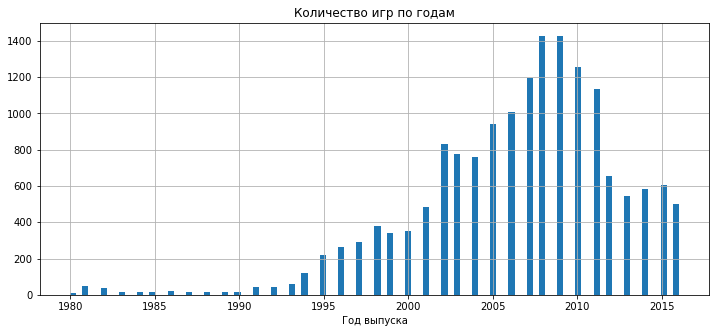

In [12]:
data[data['year_of_release']>0]['year_of_release'].hist(bins = 100, figsize = (12,5), grid = True)

plt.title('Количество игр по годам')
plt.xlabel('Год выпуска')

In [13]:
data_games_years = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index(level=-1)
data_games_years.rename(columns={'name':'name_count','year_of_release':'year'}, inplace=True)

display(data_games_years.sort_values(by='name_count', ascending = False).head())
display(data_games_years.sort_values(by='name_count', ascending = True).head())

,year,name_count
29,2008,1427
30,2009,1426
31,2010,1255
28,2007,1197
32,2011,1136


,year,name_count
1,1980,9
5,1984,14
6,1985,14
9,1988,15
8,1987,16


По гистограмме видно, что пик выпуска новых игр по годам пришелся на период 2008-2009 гг., потом количество выпусков новых игр значительно снизилось. Самые низкие показатели были до 1995 года, что неудивительно.
В данном случае можно взять массив за период 2012-2016 гг., т.к. за этот период показатели достаточно стабильны, и можно предполагать, что в дальнейшем эта тенденция будет продолжаться.

In [14]:
data_platforms_total_sales = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending = False)
display(data_platforms_total_sales.head(10))

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Построим распределение игр на наиболее популярных платформах по годам.

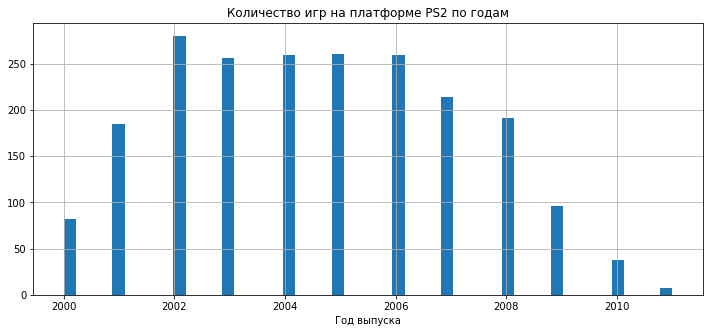

In [15]:
data_max_sales = data[
            (data['platform'] == 'PS2')& 
            (data['year_of_release'] > 0)
            ]
data_max_sales['year_of_release'].hist(bins = 50, figsize = (12,5), grid = True)

plt.title('Количество игр на платформе PS2 по годам')
plt.xlabel('Год выпуска')
plt.show()

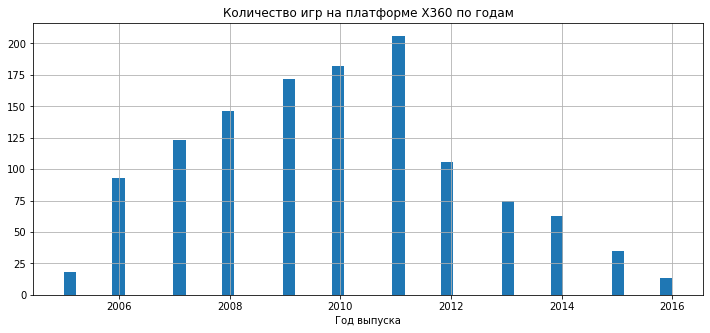

In [16]:
data_max_sales = data[
            (data['platform'] == 'X360')& 
            (data['year_of_release'] > 0)
            ]
data_max_sales['year_of_release'].hist(bins = 50, figsize = (12,5), grid = True)

plt.title('Количество игр на платформе X360 по годам')
plt.xlabel('Год выпуска')
plt.show()

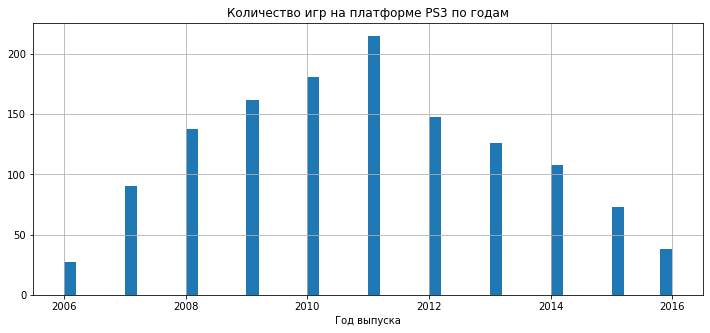

In [17]:
data_max_sales = data[
            (data['platform'] == 'PS3')& 
            (data['year_of_release'] > 0)
            ]
data_max_sales['year_of_release'].hist(bins = 50, figsize = (12,5), grid = True)

plt.title('Количество игр на платформе PS3 по годам')
plt.xlabel('Год выпуска')
plt.show()

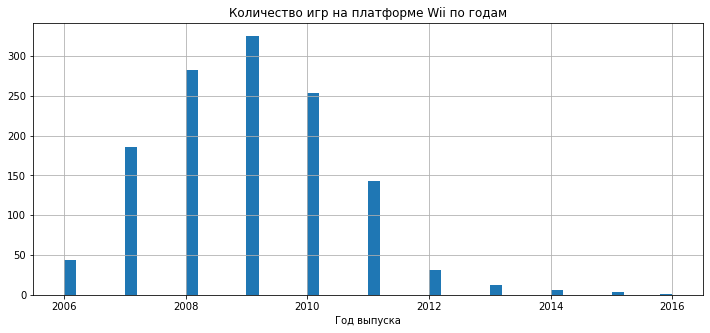

In [18]:
data_max_sales = data[
            (data['platform'] == 'Wii')& 
            (data['year_of_release'] > 0)
            ]
data_max_sales['year_of_release'].hist(bins = 50, figsize = (12,5), grid = True)

plt.title('Количество игр на платформе Wii по годам')
plt.xlabel('Год выпуска')
plt.show()

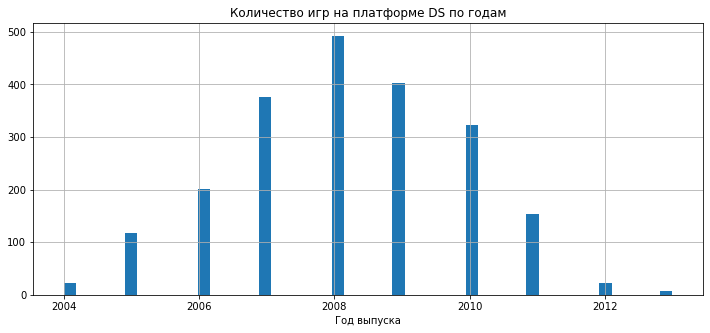

In [19]:
data_max_sales = data[
            (data['platform'] == 'DS')& 
            (data['year_of_release'] > 2000)
            ]
data_max_sales['year_of_release'].hist(bins = 50, figsize = (12,5), grid = True)

plt.title('Количество игр на платформе DS по годам')
plt.xlabel('Год выпуска')
plt.show()

После анализа графиков общего количества игр платформ с максимальными прожами по годам можно сделать следующие выводы):
* срок "жизни" платформы составляет около 10 лет,
* максимальное количество игр выпускается в середине жизненного цикла.

Получается, с учетом всех данных, актуальным периодом для построения прогнозов продаж на 2017 год будет 10-летний период. Т.е. данные надо брать за период с 2006 по 2016 гг. Тогда мы сможем понять, игры для каких платформ стоит исключить из продажи, какие будут на пике, а какие будут уже идти на спад.

In [20]:
#сделаем срез с массивом, на основе которого будем прогнозировать следующие продажи
good_data = data[data['year_of_release'] >= 2014]
good_data.reset_index(drop = True, inplace = True)
display(good_data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,not defined,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,not defined,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,not defined,7.98


## Общие продажи на разных платформах.

In [21]:
print('Значения в Platform:', good_data['platform'].sort_values().unique())
print('Количество в Platform:', len(good_data['platform'].unique()))

Значения в Platform: ['3DS' 'PC' 'PS3' 'PS4' 'PSP' 'PSV' 'Wii' 'WiiU' 'X360' 'XOne']
Количество в Platform: 10


In [22]:
good_data_platforms_total_sales = good_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending = False)
display(good_data_platforms_total_sales.head(10))

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


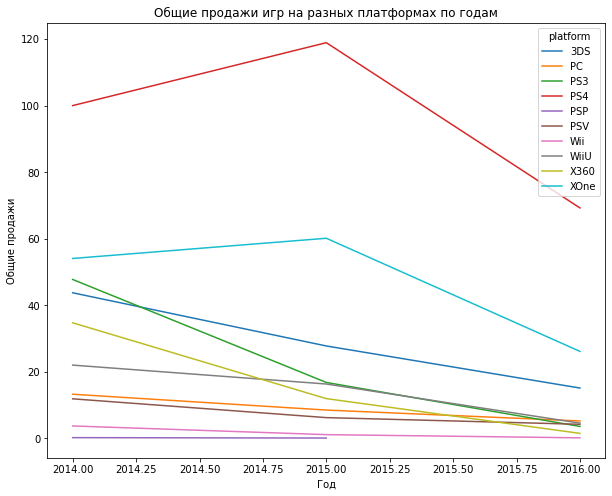

In [23]:
good_data.groupby(['platform','year_of_release'])['total_sales'].sum().unstack('platform').plot(figsize=(10,8), legend = True)
plt.title('Общие продажи игр на разных платформах по годам')
plt.xlabel('Год')
plt.ylabel('Общие продажи')
plt.show()

По суммарным общим продажам за 3 года десятка лидирующих платформ выглядит как: PS4, XOne, 3DS, PS3, X360, WiiU, PC, PSV, Wii, PSP. При этом абслютно у всех платформ в 2016 году продажи снижаются.

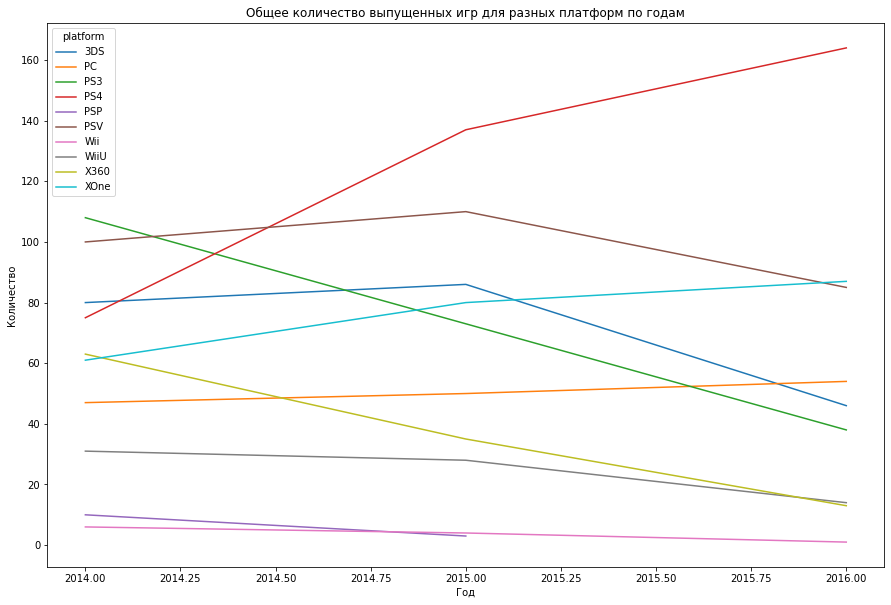

In [24]:
good_data.groupby(['platform','year_of_release'])['name'].count().unstack('platform').plot(figsize=(15,10), legend = True)
plt.title('Общее количество выпущенных игр для разных платформ по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

С точки зрения окупаемости вложений средств в новые игры наиболее перспективными в 2017 году будут платформы, которые находятся в "середине" своего жизненного цикла, т.е. были выпущены после 2010 года. Это платформы  PS4, PSV, XOne, X360, WiiU.

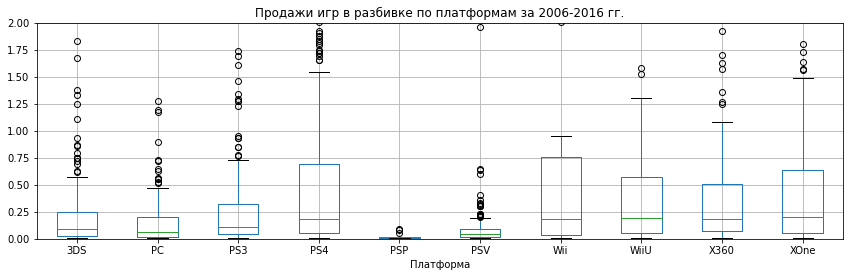

In [25]:
ax = good_data.boxplot('total_sales', by = 'platform', figsize=(14,4))
ax.set_ylim(0,2) 
ax.margins(y=0)
plt.title('Продажи игр в разбивке по платформам за 2006-2016 гг.')
plt.suptitle('')
plt.xlabel('Платформа')
plt.show()

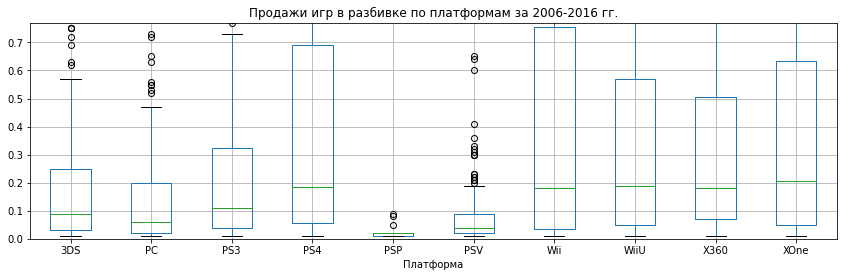

In [26]:
ax = good_data.boxplot('total_sales', by = 'platform', figsize=(14,4))
ax.set_ylim(0,0.77) 
ax.margins(y=0)
plt.title('Продажи игр в разбивке по платформам за 2006-2016 гг.')
plt.suptitle('')
plt.xlabel('Платформа')
plt.show()

В ящиках с усами очень наглядно можно сравнить медианные продажи по каждой платформе в интерсующий нас период. Так, видно, что максимальные медианные продажи были на платформах Xone, PS4, WiiU, Wii, X360. 

Построим диаграмму рассеяния.

In [27]:
#все построения работают только при изменении типа для оценки критиков на float. 
#На мой взгляд, можно пожертвовать неидеальным отображением данных
good_data['critic_score'] = good_data['critic_score'].astype('float')
good_data.info()
display(good_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 158.5+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,not defined,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,not defined,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,not defined,7.98


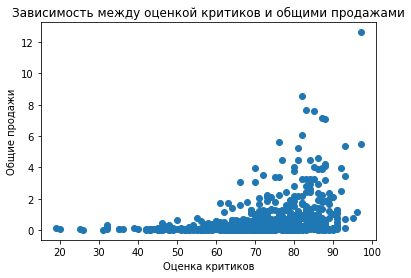

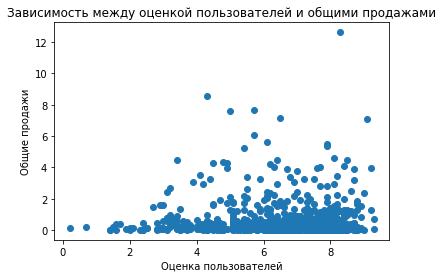

In [28]:
plt.scatter(good_data['critic_score'],good_data['total_sales'])
plt.title('Зависимость между оценкой критиков и общими продажами')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи')
plt.show()
plt.scatter(good_data['user_score'],good_data['total_sales'])
plt.title('Зависимость между оценкой пользователей и общими продажами')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи')
plt.show()

In [29]:
good_data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.122977,-0.093408,-0.056134,-0.096834,0.071818,0.013853,-0.117482
na_sales,-0.122977,1.000000,0.735920,0.264362,0.841484,0.333306,-0.028258,0.913660
eu_sales,-0.093408,0.735920,1.000000,0.188675,0.930140,0.270826,-0.040985,0.915583
jp_sales,-0.056134,0.264362,0.188675,1.000000,0.170780,0.130316,0.184141,0.418281
other_sales,-0.096834,0.841484,0.930140,0.170780,1.000000,0.289985,-0.030056,0.935091
critic_score,0.071818,0.333306,0.270826,0.130316,0.289985,1.000000,0.504460,0.328105
user_score,0.013853,-0.028258,-0.040985,0.184141,-0.030056,0.504460,1.000000,-0.013070
total_sales,-0.117482,0.913660,0.915583,0.418281,0.935091,0.328105,-0.013070,1.000000


Из таблицы с корреляцией значений видно, что итоговые продажи имеют положительную зависимость от оценки критиков и корреляция от оценки пользователей не ясна. Исходя из абсолютных значений этих величин можно сделать вывод, что на общие продажи влияет оценка, которую дадут критики. 

Соответственно, при прогнозировании успешности продаж той или иной игры можно опираться на оценку критиков и пользователей. При этом приоритетной будет являться именно высокая оценка критиков.

Проверим корректность этих утверждении на анализе топ-5 самых популярных платформ с максимальной прибылью.

In [30]:
display(good_data_platforms_total_sales.head(5).index.to_list())

['PS4', 'XOne', '3DS', 'PS3', 'X360']

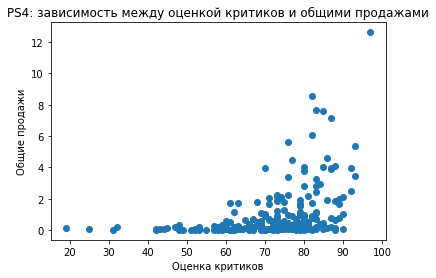

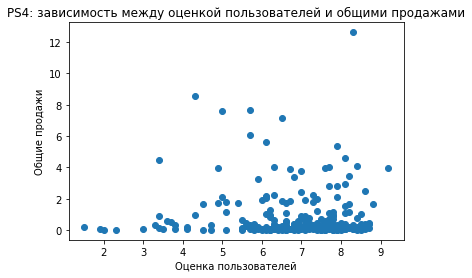

In [31]:
good_data_ps4 = good_data.query('platform == "PS4"')
plt.scatter(good_data_ps4['critic_score'],good_data_ps4['total_sales'])
plt.title('PS4: зависимость между оценкой критиков и общими продажами')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи')
plt.show()
plt.scatter(good_data_ps4['user_score'],good_data_ps4['total_sales'])
plt.title('PS4: зависимость между оценкой пользователей и общими продажами')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи')
plt.show()

In [32]:
good_data_ps4.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.219443,-0.195176,-0.040969,-0.219129,-0.044226,0.035502,-0.214338
na_sales,-0.219443,1.000000,0.784902,0.491452,0.944903,0.411638,-0.016156,0.928090
eu_sales,-0.195176,0.784902,1.000000,0.472101,0.944380,0.340268,-0.064199,0.958109
jp_sales,-0.040969,0.491452,0.472101,1.000000,0.510433,0.379041,0.179384,0.538524
other_sales,-0.219129,0.944903,0.944380,0.510433,1.000000,0.404645,-0.044166,0.998252
critic_score,-0.044226,0.411638,0.340268,0.379041,0.404645,1.000000,0.546434,0.402661
user_score,0.035502,-0.016156,-0.064199,0.179384,-0.044166,0.546434,1.000000,-0.040132
total_sales,-0.214338,0.928090,0.958109,0.538524,0.998252,0.402661,-0.040132,1.000000


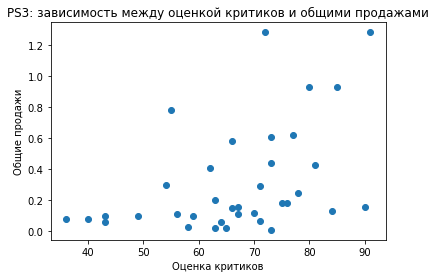

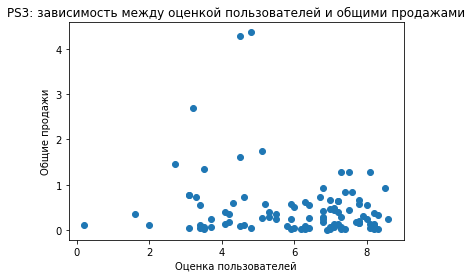

In [33]:
good_data_ps3 = good_data.query('platform == "PS3"')
plt.scatter(good_data_ps3['critic_score'],good_data_ps3['total_sales'])
plt.title('PS3: зависимость между оценкой критиков и общими продажами')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи')
plt.show()
plt.scatter(good_data_ps3['user_score'],good_data_ps3['total_sales'])
plt.title('PS3: зависимость между оценкой пользователей и общими продажами')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи')
plt.show()

In [34]:
good_data_ps3.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.231944,-0.160750,-0.104468,-0.211340,-0.044960,-0.258182,-0.215222
na_sales,-0.231944,1.000000,0.737180,0.017355,0.928249,0.412858,-0.222793,0.899533
eu_sales,-0.160750,0.737180,1.000000,0.025540,0.935108,0.287064,-0.161817,0.945808
jp_sales,-0.104468,0.017355,0.025540,1.000000,0.023772,0.450181,0.295358,0.149133
other_sales,-0.211340,0.928249,0.935108,0.023772,1.000000,0.390738,-0.206106,0.990464
critic_score,-0.044960,0.412858,0.287064,0.450181,0.390738,1.000000,0.693445,0.446575
user_score,-0.258182,-0.222793,-0.161817,0.295358,-0.206106,0.693445,1.000000,-0.166761
total_sales,-0.215222,0.899533,0.945808,0.149133,0.990464,0.446575,-0.166761,1.000000


Гистограмма рассеяния и таблица с корреляцией показывает, что для продаж для платформы PS3 характерна такая же зависимость от оценки критиков и пользователей, как и для основной массы: положительная с оценкой критиков и отрицательная с оценкой пользователей.

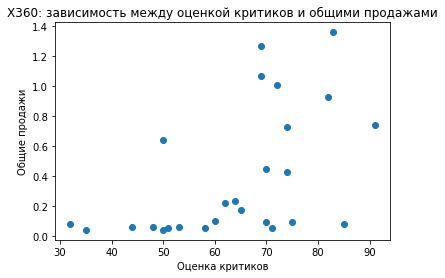

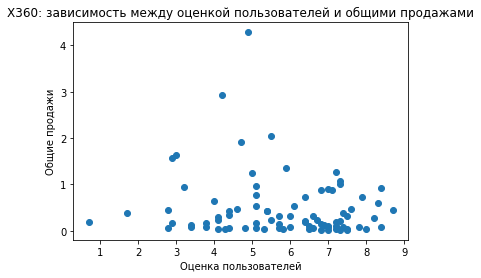

In [35]:
good_data_X360 = good_data.query('platform == "X360"')
plt.scatter(good_data_X360['critic_score'],good_data_X360['total_sales'])
plt.title('X360: зависимость между оценкой критиков и общими продажами')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи')
plt.show()
plt.scatter(good_data_X360['user_score'],good_data_X360['total_sales'])
plt.title('X360: зависимость между оценкой пользователей и общими продажами')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи')
plt.show()

In [36]:
good_data_X360.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.224167,-0.195040,-0.195843,-0.237644,NaN,-0.252575,-0.238375
na_sales,-0.224167,1.000000,0.588317,0.151322,0.978530,0.539778,-0.133585,0.944965
eu_sales,-0.195040,0.588317,1.000000,0.090998,0.737452,0.443965,-0.106952,0.820443
jp_sales,-0.195843,0.151322,0.090998,1.000000,0.154383,0.435430,0.089151,0.148872
other_sales,-0.237644,0.978530,0.737452,0.154383,1.000000,0.544409,-0.137688,0.990365
critic_score,NaN,0.539778,0.443965,0.435430,0.544409,1.000000,0.625309,0.525723
user_score,-0.252575,-0.133585,-0.106952,0.089151,-0.137688,0.625309,1.000000,-0.138445
total_sales,-0.238375,0.944965,0.820443,0.148872,0.990365,0.525723,-0.138445,1.000000


Из диаграмм рассеяния трудно сделать какие-либо выводы, но график с корреляцией явно подтверждает общую тенденцию.

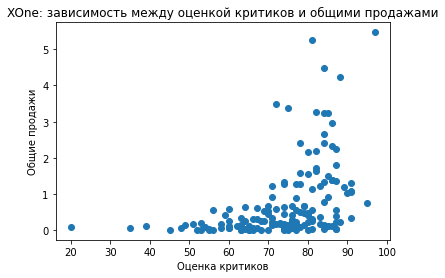

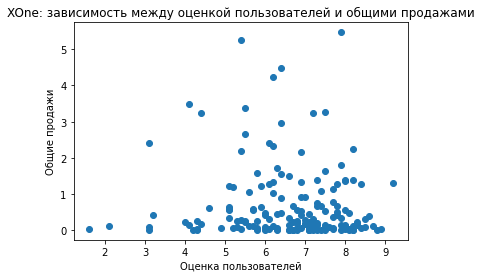

In [37]:
good_data_XOne = good_data.query('platform == "XOne"')
plt.scatter(good_data_XOne['critic_score'],good_data_XOne['total_sales'])
plt.title('XOne: зависимость между оценкой критиков и общими продажами')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи')
plt.show()
plt.scatter(good_data_XOne['user_score'],good_data_XOne['total_sales'])
plt.title('XOne: зависимость между оценкой пользователей и общими продажами')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи')
plt.show()

In [38]:
good_data_XOne.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.225464,-0.204378,-0.173475,-0.231761,-0.012092,-0.033366,-0.231327
na_sales,-0.225464,1.000000,0.763032,0.435269,0.987812,0.401137,-0.068053,0.969688
eu_sales,-0.204378,0.763032,1.000000,0.424716,0.852089,0.385121,-0.061547,0.897802
jp_sales,-0.173475,0.435269,0.424716,1.000000,0.450555,0.207366,0.062259,0.460953
other_sales,-0.231761,0.987812,0.852089,0.450555,1.000000,0.425689,-0.069776,0.995134
critic_score,-0.012092,0.401137,0.385121,0.207366,0.425689,1.000000,0.440977,0.428677
user_score,-0.033366,-0.068053,-0.061547,0.062259,-0.069776,0.440977,1.000000,-0.070384
total_sales,-0.231327,0.969688,0.897802,0.460953,0.995134,0.428677,-0.070384,1.000000


Гистограмма рассеяния и таблица с корреляцией показывает, что для платформы Xone характерна такая же зависимость продаж от оценки критиков и пользователей, как и для основной массы: положительная с оценкой критиков и отрицательная с оценкой пользователей

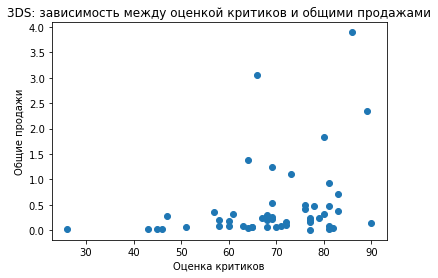

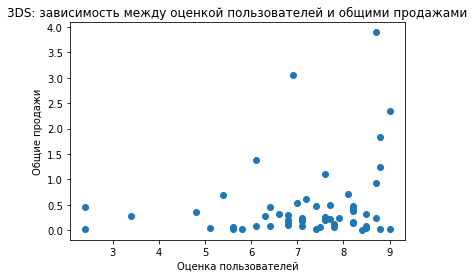

In [39]:
good_data_3DS = good_data.query('platform == "3DS"')
plt.scatter(good_data_3DS['critic_score'],good_data_3DS['total_sales'])
plt.title('3DS: зависимость между оценкой критиков и общими продажами')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи')
plt.show()
plt.scatter(good_data_3DS['user_score'],good_data_3DS['total_sales'])
plt.title('3DS: зависимость между оценкой пользователей и общими продажами')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи')
plt.show()

In [40]:
good_data_3DS.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.064862,-0.080950,-0.065903,-0.069488,0.201100,0.235841,-0.077659
na_sales,-0.064862,1.000000,0.926126,0.598757,0.995141,0.363441,0.254592,0.926824
eu_sales,-0.080950,0.926126,1.000000,0.570443,0.957303,0.178086,0.014621,0.902940
jp_sales,-0.065903,0.598757,0.570443,1.000000,0.600666,0.279149,0.235903,0.844990
other_sales,-0.069488,0.995141,0.957303,0.600666,1.000000,0.330872,0.203967,0.933912
critic_score,0.201100,0.363441,0.178086,0.279149,0.330872,1.000000,0.862485,0.314117
user_score,0.235841,0.254592,0.014621,0.235903,0.203967,0.862485,1.000000,0.215193
total_sales,-0.077659,0.926824,0.902940,0.844990,0.933912,0.314117,0.215193,1.000000


Для платформы 3DS характерна положительная корреляция между продажами и оценкой как критиков, так и пользователей (последнее отличается от всех других рассмотренных платформ).

В той или иной степени зависимость продаж от оценок критиков наблюдается у всех топ-5 платформ.

## Общее распределение игр по жанрам.

In [41]:
display(good_data.head(2))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,not defined,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Text(0.5, 1.0, 'Общие продажи игр разных жанров')

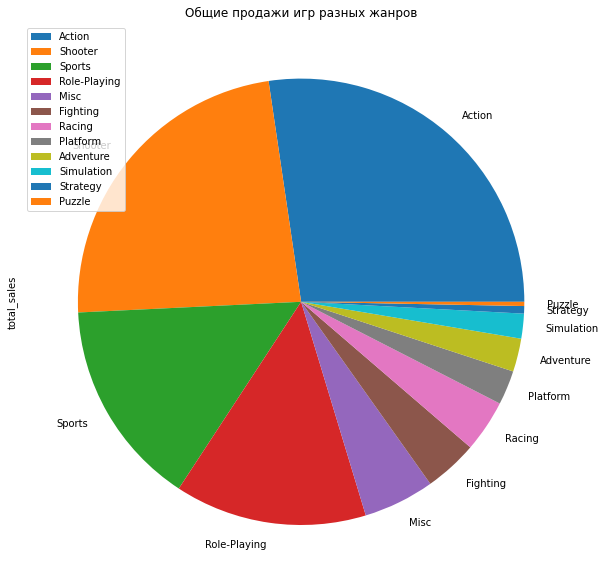

In [42]:
good_data.groupby(['genre'])['total_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', figsize=(10,16), legend = True)
plt.legend(loc='upper left')
plt.title('Общие продажи игр разных жанров')

Топ-5 самых популярных жанров: Action, Shooter, Sports, Misc, Role-Playing.

Топ-5 самых непопулярных жанров: Strategy, Puzzle, Adventure, Platformn, Simulation.

Text(0.5, 1.0, 'Количество игр разных жанров')

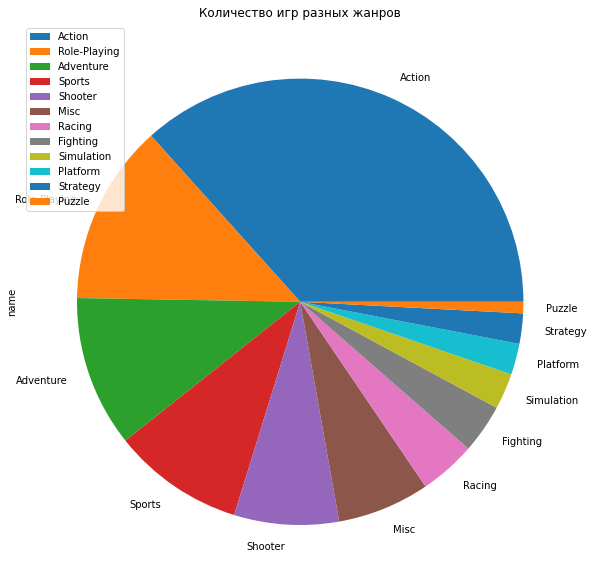

In [43]:
good_data.groupby(['genre'])['name'].count().sort_values(ascending = False).plot(kind = 'pie', figsize=(10,16), legend = True)
plt.legend(loc='upper left')
plt.title('Количество игр разных жанров')

Топ-5 самых популярных жанров по количеству игр: Action, Adventure, Sports, Shooter, Role-Playing.

Топ-5 самых непопулярных жанров по количеству игр: Platform, Strategy, Puzzle, Fighting, Simulation.

Интересно, что хотя и в жанре Adventure выпускается большое количество игр, прибыль от их продажи одна из самых минимальных.

Text(0, 0.5, 'Количество')

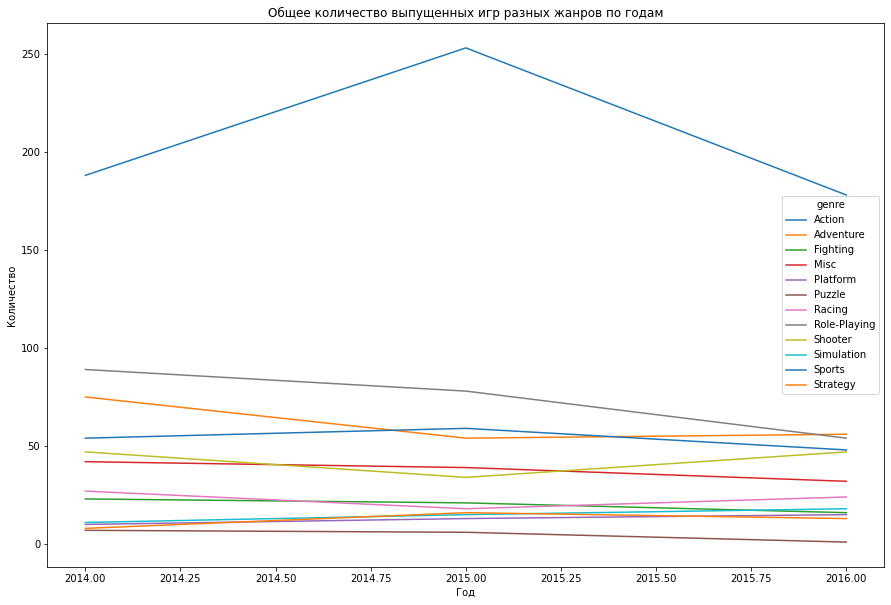

In [44]:
#посмотрим, как меняется динамика жанров игр по годам
good_data.groupby(['genre','year_of_release'])['name'].count().unstack('genre').plot(figsize=(15,10), legend = True)
plt.title('Общее количество выпущенных игр разных жанров по годам')
plt.xlabel('Год')
plt.ylabel('Количество')

Количество игр по жанрам плюс-минус стабильно в исследуемый период.

Text(0, 0.5, 'Сумма')

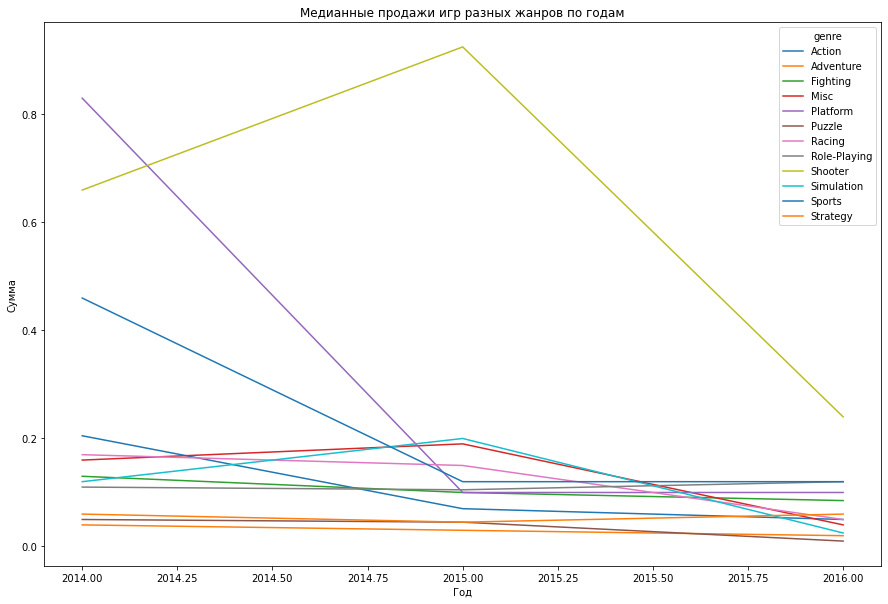

In [45]:
#посмотрим, как меняется динамика продаж разных жанров игр по годам
good_data.groupby(['genre','year_of_release'])['total_sales'].median().unstack('genre').plot(figsize=(15,10), legend = True)
plt.title('Медианные продажи игр разных жанров по годам')
plt.xlabel('Год')
plt.ylabel('Сумма')

Игры жанров Shooter, PLatform и Action демонстрируют сильное снижение медианных продаж после 2015 года. Но несмотря на это медаинные продажи этих трех жанров достаточно высокие. Такая же тенденция у игр жанра Simulation, Misc, Racing, но снижение оказывается существенное влияние на их рейтинг (не в топ по медианным продажам).

## Портрет пользователя каждого региона

In [46]:
display(good_data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,not defined,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,not defined,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,not defined,7.98


### Самые популярные жанры игр по регионам

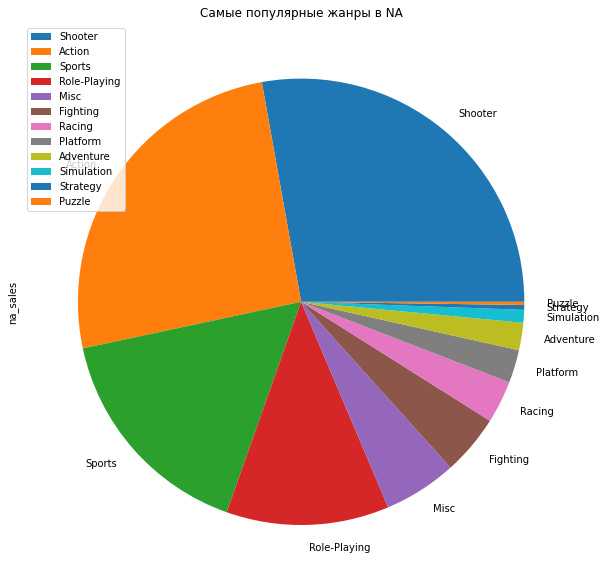

In [47]:
good_data.groupby(['genre'])['na_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', figsize=(10,16), legend = True)
plt.legend(loc='upper left')
plt.title('Самые популярные жанры в NA')
plt.show()

Топ-5 самых популярных жанров в Северной Америке: Action, Shooter, Sports, Misc, Role-Playing.

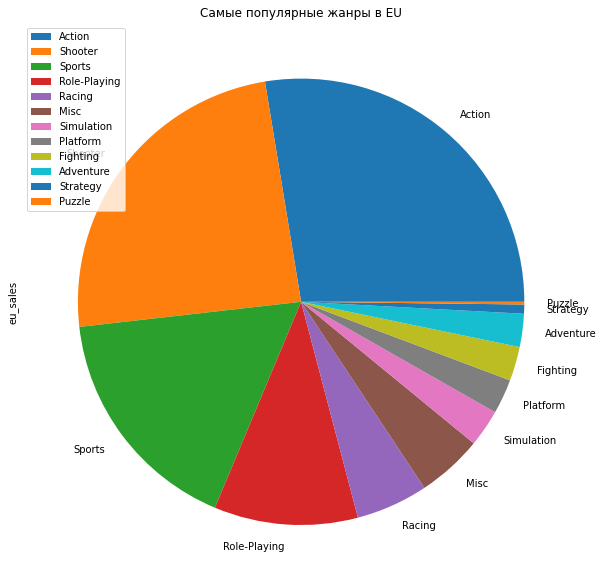

In [48]:
good_data.groupby(['genre'])['eu_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', figsize=(10,16), legend = True)
plt.legend(loc='upper left')
plt.title('Самые популярные жанры в EU')
plt.show()

Топ-5 самых популярных жанров в Европе: Action, Shooter, Sports, Role-Playing, Racing (в отличие от Северной Америки, где 5 по популярности включает Misc).

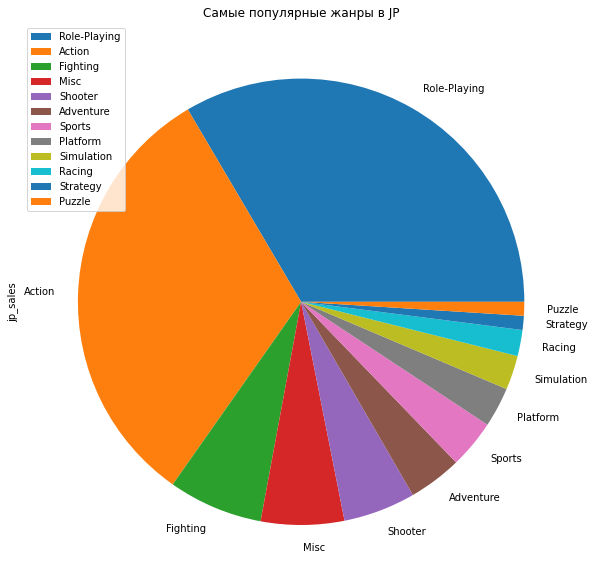

In [49]:
good_data.groupby(['genre'])['jp_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', figsize=(10,16), legend = True)
plt.legend(loc='upper left')
plt.title('Самые популярные жанры в JP')
plt.show()

Топ-5 самых популярных жанров в Японии сильно отличаются от американских или европейских: Role-Playing, Action, Misc, Fighting, Shooter.

### Самые популярные платформы по регионам

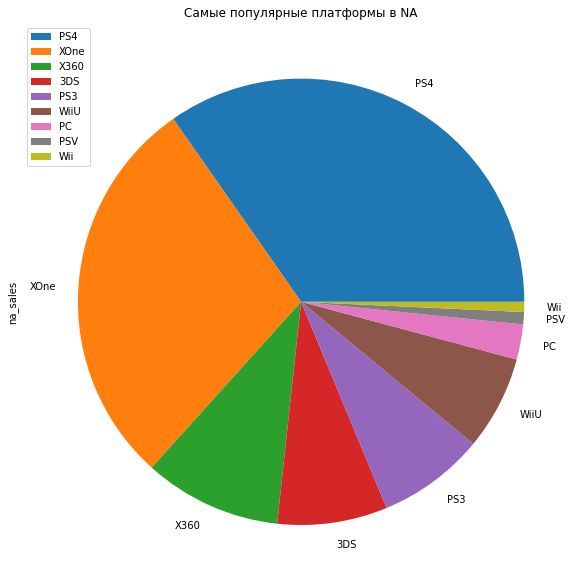

In [50]:
good_data.groupby(['platform'])['na_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', figsize=(10,16), legend = True)
plt.legend(loc='upper left')
plt.title('Самые популярные платформы в NA')
plt.show()

Топ-5 самых популярных платформ в Северной Америке - PS4, XOne, X360, 3DS, PS3.

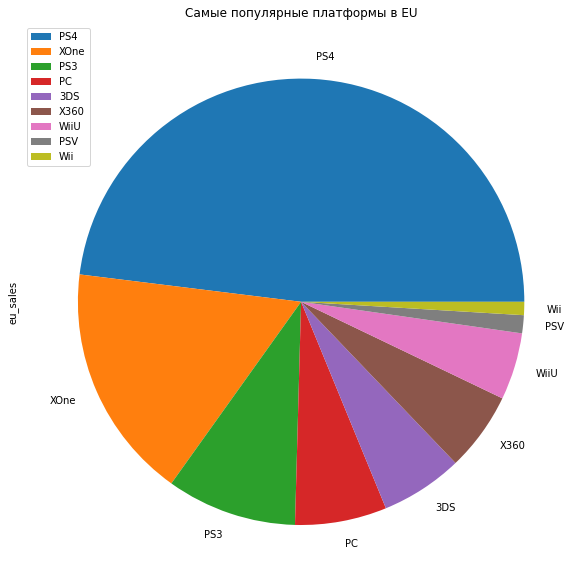

In [51]:
good_data.groupby(['platform'])['eu_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', figsize=(10,16), legend = True)
plt.legend(loc='upper left')
plt.title('Самые популярные платформы в EU')
plt.show()

Топ-5 самых популярных платформ в Европе -  PS4, XOne, PS3, PC, 3DS.

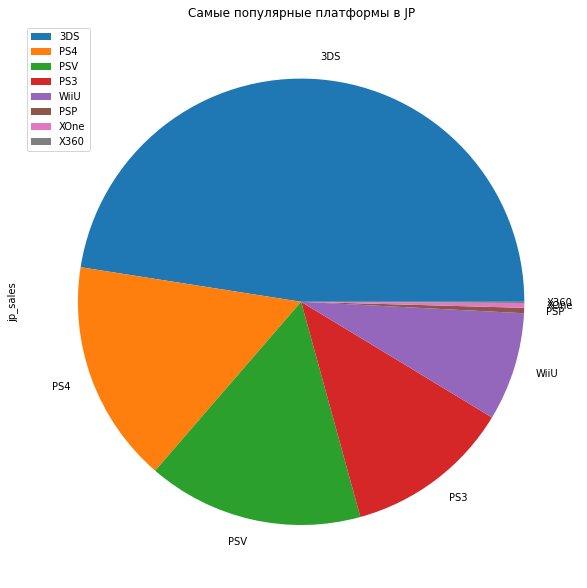

In [52]:
good_data.groupby(['platform'])['jp_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', figsize=(10,16), legend = True)
plt.legend(loc='upper left')
plt.title('Самые популярные платформы в JP')
plt.show()

Топ-5 самых популярных платформ в Японии -  3DS, PS4, PSV, PS3, WiiU.
Опять стоит отметить, что японские пользователи сильно отличаются от американских и европейских и предпочитаемыми платформами.

### Зависимость продаж от рейтинга ESRB.

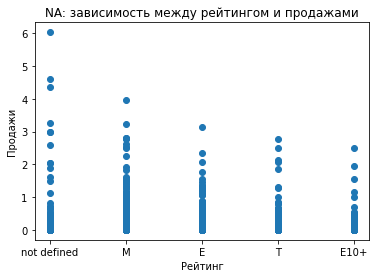

In [53]:
plt.scatter(good_data['rating'],good_data['na_sales'])
plt.title('NA: зависимость между рейтингом и продажами')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

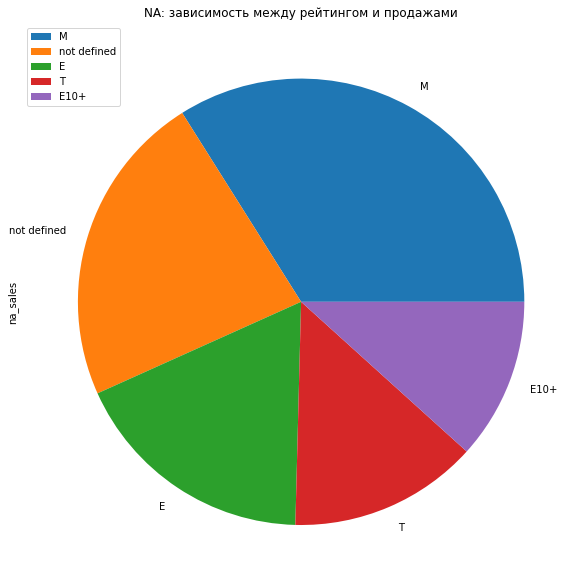

In [54]:
good_data.groupby(['rating'])['na_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', figsize=(10,16), legend = True)
plt.legend(loc='upper left')
plt.title('NA: зависимость между рейтингом и продажами')
plt.show()

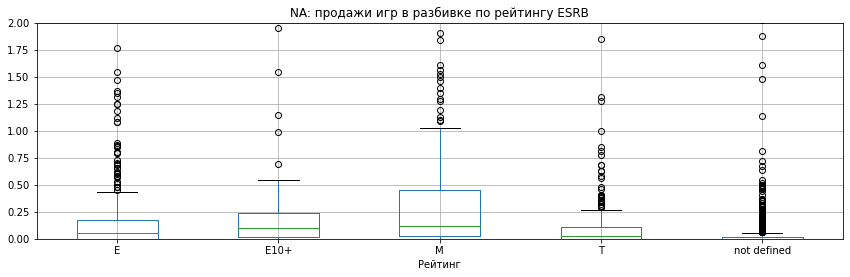

In [55]:
ax = good_data.boxplot('na_sales', by = 'rating', figsize=(14,4))
ax.set_ylim(0,2)
plt.title('NA: продажи игр в разбивке по рейтингу ESRB')
plt.suptitle('')
plt.xlabel('Рейтинг')
plt.show()

In [56]:
display(good_data.groupby(['rating'])['na_sales'].mean().sort_values(ascending = False))

rating
M              0.363849
E              0.231689
E10+           0.179622
T              0.143727
not defined    0.086409
Name: na_sales, dtype: float64

Исходя из проведенного анализа можно сделать вывод, что наличие рейтинга игры влияет на продажи в Северной Америке: наиболее прибыльные игры с рейтингом M.

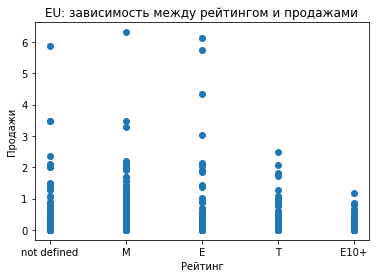

In [57]:
plt.scatter(good_data['rating'],good_data['eu_sales'])
plt.title('EU: зависимость между рейтингом и продажами')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

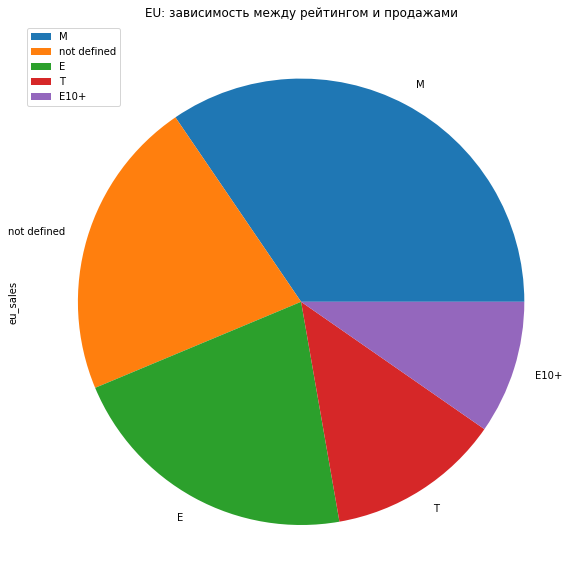

In [58]:
good_data.groupby(['rating'])['eu_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', figsize=(10,16), legend = True)
plt.legend(loc='upper left')
plt.title('EU: зависимость между рейтингом и продажами')
plt.show()

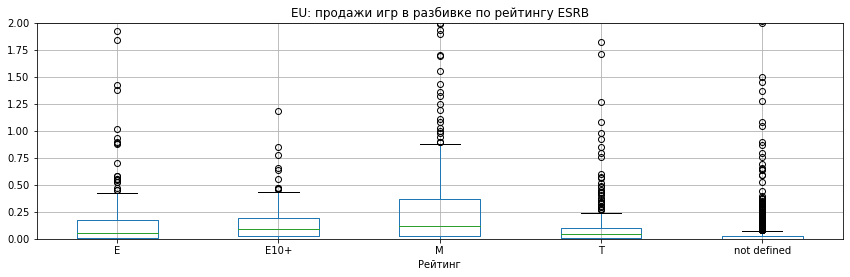

In [59]:
ax = good_data.boxplot('eu_sales', by = 'rating', figsize=(14,4))
ax.set_ylim(0,2)
plt.title('EU: продажи игр в разбивке по рейтингу ESRB')
plt.suptitle('')
plt.xlabel('Рейтинг')
plt.show()

In [60]:
display(good_data.groupby(['rating'])['eu_sales'].mean().sort_values(ascending = False))

rating
M              0.352604
E              0.265114
E10+           0.141405
T              0.125720
not defined    0.078705
Name: eu_sales, dtype: float64

Исходя из проведенного анализа можно сделать вывод, что наличие рейтинга игры влияет на продажи в Европе: наиболее прибыльные игры с рейтингом M.

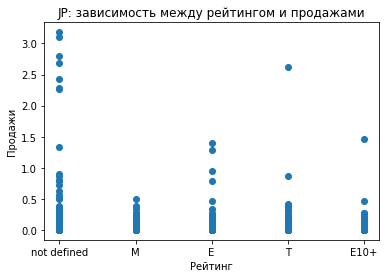

In [61]:
plt.scatter(good_data['rating'],good_data['jp_sales'])
plt.title('JP: зависимость между рейтингом и продажами')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

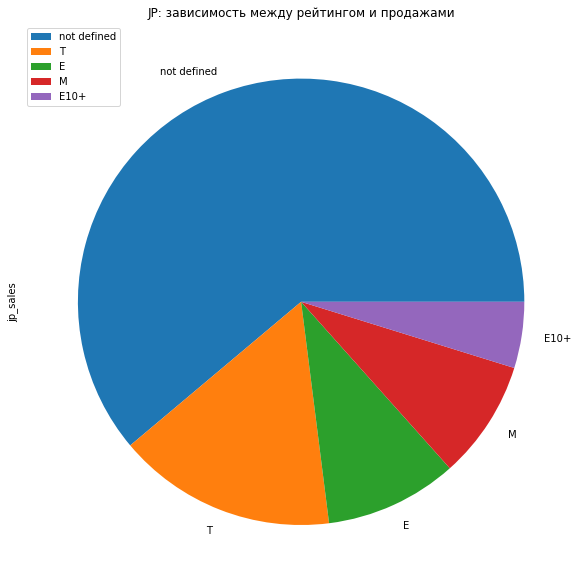

In [62]:
good_data.groupby(['rating'])['jp_sales'].sum().sort_values(ascending = False).plot(kind = 'pie', figsize=(10,16), legend = True)
plt.legend(loc='upper left')
plt.title('JP: зависимость между рейтингом и продажами')
plt.show()

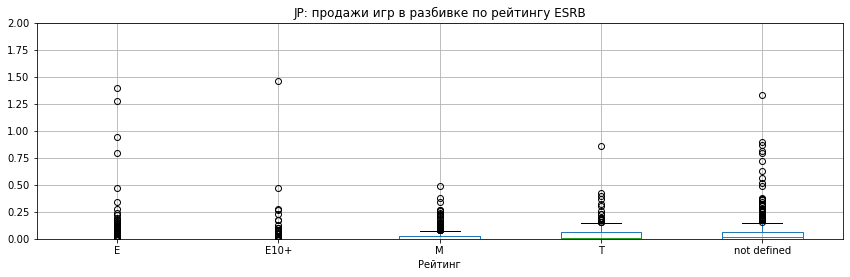

In [63]:
ax = good_data.boxplot('jp_sales', by = 'rating', figsize=(14,4))
ax.set_ylim(0,2)
plt.title('JP: продажи игр в разбивке по рейтингу ESRB')
plt.suptitle('')
plt.xlabel('Рейтинг')
plt.show()

In [64]:
display(good_data.groupby(['rating'])['jp_sales'].mean().sort_values(ascending = False))

rating
not defined    0.075968
T              0.054539
E              0.040822
M              0.030226
E10+           0.024108
Name: jp_sales, dtype: float64

В Японии основная масса игр не имеет рейтинга ESBR, поэтому ориентироваться на рейтинг при прогнозе продаж в этой стране невозможно.

## Проверка гипотез

In [65]:
good_data_test = good_data.fillna(-1)
good_data_xbox = good_data_test.query('platform == "XOne" and user_score != -1')
good_data_pc = good_data_test.query('platform == "PC"  and user_score != -1')
good_data_action = good_data_test.query('genre == "Action" and user_score != -1')
good_data_sports = good_data_test.query('genre == "Sports"  and user_score != -1')

### Гипотеза о рейтинге платформ

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные.

In [66]:
print('Средний пользовательский рейтинг платформы Xbox One:', good_data_xbox['user_score'].mean())
print('Средний пользовательский рейтинг платформы PC:', good_data_pc['user_score'].mean())

Средний пользовательский рейтинг платформы Xbox One: 6.594545454545453
Средний пользовательский рейтинг платформы PC: 6.298360655737703


In [67]:
xbox_test = good_data_xbox['user_score']
pc_test = good_data_pc['user_score']

alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(# проверка гипотезы о равенстве средних двух независимых совокупностей
    xbox_test, 
    pc_test,
    equal_var = False) # т.к. дисперсии не равны

print('p-значение:', results.pvalue) 

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


**Вывод:** средние пользовательские рейтинги платформ разные. Рейтинг платформы Xbox One ниже, чем PC.

### Гипотеза о рейтинге жанров

Нулевая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

In [68]:
print('Средний пользовательский рейтинг жанра Action:', good_data_action['user_score'].mean())
print('Средний пользовательский рейтинг жанры Sports:', good_data_sports['user_score'].mean())

Средний пользовательский рейтинг жанра Action: 6.760606060606054
Средний пользовательский рейтинг жанры Sports: 5.225196850393697


In [69]:
action_test = good_data_action['user_score']
sports_test = good_data_sports['user_score']

alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(# проверка гипотезы о равенстве средних двух независимых совокупностей
    xbox_test, 
    pc_test,
    equal_var = False) # т.к. дисперсии не равны

print('p-значение:', results.pvalue) 

if results.pvalue < alpha: 
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 0.11601398086668827
Отвергаем нулевую гипотезу


**Вывод:** средние пользовательские рейтинги жанров Action и Sports разные. Рейтинг жанра Action выше, чем жанра Sports.

## Общий вывод

### Изучение данных из файла

Таблица состоит из 11 столбцов и 16714 строк с разными типами значений (вещественные, категориальные).<br>
Явных дубликатов в таблице нет.<br>
Есть большое количество столбцов с пропущенными данными:
* часть строк с пропусками можно удалить, т.к. их доля очень мала и не окажет влияния на общий результат,
* в других случаях в зависимости от особенностей данных будет производится замена или оставлены пропуски.

У части данных необходимо изменить тип данных.<br>

### Предобработка данных

- заменяем пропущенные значения User_Score TBD на NaN,
- заменяем название заглавные буквы в заголовках на строчные,
- заменяем значения year_of_release и critic_score на целочисленные, a user_score на числовой (float),
- заменяем значения NaN в стобце rating на not defined.

### Расчёты и добавление результатов в таблицу

Рассчитаем и добавим общие продажи игр по всем регионам.

### Исследовательский анализ данных

**Построили распределение выпуска новых игр по годам.**<br>
Пик выпуска новых игр по годам пришелся на период 2008-2009 гг., потом количество выпусков новых игр значительно снизилось. Самые низкие показатели были до 1995 года.<br>

**Построили распределение игр на наиболее популярных платформах по годам.**<br>
После анализа графиков общего количества игр платформ с максимальными прожами по годам можно сделать следующие выводы):
* срок "жизни" платформы составляет около 10 лет,
* максимальное количество игр выпускается в середине жизненного цикла.
<br>
Но актуальным периодом для построения прогнозов продаж на 2017 год будет 3-летний период. Т.е. **данные надо брать за период с 2014 по 2016 гг.** Тогда мы сможем понять, игры для каких платформ стоит исключить из продажи, какие будут на пике, а какие будут уже идти на спад.

**Анализ общих продаж на разных платформах.**

По суммарным общим продажам за 3 года десятка лидирующих платформ выглядит как: PS4, XOne, 3DS, PS3, X360, WiiU, PC, PSV, Wii, PSP. При этом абслютно у всех платформ в 2016 году продажи снижаются.<br>

С точки зрения окупаемости вложений средств в новые игры наиболее перспективными в 2017 году будут платформы, которые находятся в "середине" своего жизненного цикла, т.е. были выпущены после 2010 года. Это платформы  PS4, PSV, XOne, X360, WiiU.<br>

В ящиках с усами очень наглядно можно сравнить медианные продажи по каждой платформе в интерсующий нас период. Так, видно, что максимальные медианные продажи были на платформах Xone, PS4, WiiU, Wii, X360. <br>

Из таблицы с корреляцией значений видно, что итоговые продажи имеют положительную зависимость от оценки критиков. А исходя из абсолютных значений этих величин можно сделать вывод, что на общие продажи положительно влияет оценка, которую дадут критики, с оценкой пользователей прослеживается обратная завитсимость.<br>

Соответственно, при прогнозировании успешности продаж той или иной игры можно опираться на оценку критиков. При анализе ТОП-5 самых популярных платформ этот вывод подтверждается на четырех.


**Общее распределение игр по жанрам.**

Топ-5 самых популярных жанров по общим продажам: Action, Shooter, Sports, Misc, Role-Playing.<br>
Топ-5 самых непопулярных жанров по общим продажам: Strategy, Puzzle, Adventure, Platformn, Simulation.<br>

<br>
Топ-5 самых популярных жанров по количеству игр: Action, Adventure, Sports, Shooter, Role-Playing.<br>
Топ-5 самых непопулярных жанров по количеству игр: Platform, Strategy, Puzzle, Fighting, Simulation..<br>
<br>
Хотя и в жанре Adventure выпускается большое количество игр, прибыль от их продажи одна из самых минимальных.<br>
Количество игр по жанрам плюс-минус стабильно в исследуемый период.<br>
<br>
Игры жанров Shooter, PLatform и Action демонстрируют сильное снижение медианных продаж после 2015 года. Но, несмотря на это, медианные продажи этих трех жанров достаточно высокие. Такая же тенденция у игр жанра Simulation, Misc, Racing, но снижение оказывается существенное влияние на их рейтинг (не в топ по медианным продажам).

### Портрет пользователя каждого региона
#### Самые популярные жанры игр по регионам
Топ-5 самых популярных жанров в Северной Америке: Action, Shooter, Sports, Misc, Role-Playing.<br>
Топ-5 самых популярных жанров в Европе: Action, Shooter, Sports, Role-Playing, Racing (в отличие от Северной Америки, где 5 по популярности включает Misc).<br>
Топ-5 самых популярных жанров в Японии сильно отличаются от американских или европейских: Role-Playing, Action, Misc, Fighting, Shooter.<br>

#### Самые популярные платформы по регионам
Топ-5 самых популярных платформ в Северной Америке - PS4, XOne, X360, 3DS, PS3.<br>
Топ-5 самых популярных платформ в Европе - PS4, XOne, PS3, PC, 3DS.<br>
Топ-5 самых популярных платформ в Японии - 3DS, PS4, PSV, PS3, WiiU.<br>
Опять стоит отметить, что японские пользователи сильно отличаются от американских и европейских и предпочитаемыми платформами.

#### Зависимость продаж от рейтинга ESRB.
Исходя из проведенного анализа можно сделать вывод, что наличие рейтинга игры влияет на продажи в Северной Америке и Европе: наиболее прибыльные игры с рейтингом M.<br>
В Японии основная масса игр не имеет рейтинга ESBR, поэтому ориентироваться на рейтинг при прогнозе продаж в этой стране невозможно.<br>

### Проверка гипотез
#### Гипотеза о рейтинге платформ
**Средний пользовательский рейтинг платформы Xbox One:** 6.52<br>
**Средний пользовательский рейтинг платформы PC:** 6.77<br>
**Вывод:** средние пользовательские рейтинги платформ разные. Рейтинг платформы Xbox One ниже, чем PC.<br>

### Гипотеза о рейтинге жанров
**Средний пользовательский рейтинг жанра Action:** 6.84<br>
**Средний пользовательский рейтинг жанры Sports:** 6.31<br>
**Вывод:** средние пользовательские рейтинги жанров Action и Sports разные. Рейтинг жанра Action выше, чем жанра Sports.<br>